In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
cricket_df = pd.read_csv("cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [5]:
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [26]:
RFM = cricket_df[['Player','SR', 'Ave']]

In [28]:
RFM.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


In [29]:
RFM_norm1 = RFM.drop("Player", axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(criteria)

In [30]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['SR','Ave']
RFM_norm1.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [31]:
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=4)

In [32]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['Player','SR', 'Ave', 'ClusterID']

In [33]:
RFM_km.head()

,Player,SR,Ave,ClusterID
0,SR Tendulkar (INDIA),86.23,44.83,1
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,2
2,RT Ponting (AUS/ICC),80.39,42.03,2
3,ST Jayasuriya (Asia/SL),91.20,32.36,3
4,DPMD Jayawardene (Asia/SL),78.96,33.37,0


In [60]:
RFM_km.loc[RFM_km['ClusterID']==1]

,Player,SR,Ave,ClusterID
0,SR Tendulkar (INDIA),86.23,44.83,1
13,MS Dhoni (Asia/INDIA),88.69,51.32,1
15,AB de Villiers (Afr/SA),100.25,53.55,1
25,V Kohli (INDIA),90.99,53.94,1
34,HM Amla (SA),89.05,50.25,1
38,MG Bevan (AUS),74.16,53.58,1
42,IVA Richards (WI),90.20,47.00,1
63,MJ Guptill (NZ),87.73,43.30,1
64,MEK Hussey (AUS),87.16,48.15,1


In [35]:
clusterid

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Name: Player, Length: 79, dtype: bool

## Hierarchical clustering


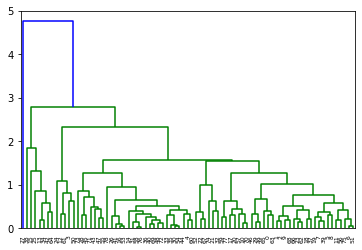

In [66]:
mergings = linkage(RFM_norm1, method = "average", metric='euclidean')
dendrogram(merging)
plt.show()

In [67]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
RFM_hc = pd.concat([RFM, clusterCut], axis=1)
RFM_hc.columns = ['Player','SR', 'Ave', 'ClusterID']

In [83]:
RFM_hc.loc[RFM_hc['Player'].str.startswith('R')]

,Player,SR,Ave,ClusterID
2,RT Ponting (AUS/ICC),80.39,42.03,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,0
47,RB Richardson (WI),63.74,33.41,0
55,Rameez Raja (PAK),63.31,32.09,0
56,RR Sarwan (WI),75.74,42.67,0
65,RG Sharma (INDIA),84.56,42.46,0
73,RS Mahanama (SL),60.57,29.49,0
